In [118]:
# ✅ Predicting 30-Day Hospital Readmission Risk
#
# This notebook demonstrates building a machine learning model
# to predict the risk of hospital readmission within 30 days of discharge
# using real Electronic Health Record (EHR) and demographic data
#
# Workflow:
# - Load the real diabetic_data.csv dataset
# - Preprocess features (cleaning, encoding, scaling)
# - Train a Gradient Boosting model
# - Evaluate with confusion matrix, precision, and recall
# - Examine and interpret top 10 feature importances

# 📌 Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

# Set Seaborn style for plots
sns.set(style='whitegrid')


In [119]:
# ✅ Load the real dataset
# Make sure diabetic_data.csv is in your Colab environment
df = pd.read_csv('/content/diabetic_data.csv')
df.head()  # View first 5 rows to confirm loading

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [120]:
# ✅ Check the columns in the dataset
df.columns  # Helps identify variables to keep, drop, or encode


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [121]:
# Data Preprocessing

#We will handle missing values, encode categorical variables, and normalize numerical features.


In [122]:
# ✅ Data inspection
# Check types, summary statistics, and missing data
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [123]:
# ✅ Create binary target variable
# 'readmitted' has values like '<30', '>30', 'NO'
# We convert to 1 if readmitted within 30 days, else 0
df['readmitted_30d'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)


In [124]:
# ✅ Drop unnecessary identifiers
# encounter_id and patient_nbr don't help prediction
# Also drop the original 'readmitted' since we created a binary target
drop_cols = ['encounter_id', 'patient_nbr', 'readmitted']
for col in drop_cols:
    if col in df.columns:
        df = df.drop(col, axis=1)

df.head()  # Confirm columns were dropped


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_30d
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [125]:
# ✅ Clean missing values
# Replace '?' with proper NA marker
df = df.replace('?', pd.NA)

# Drop columns with >30% missing data
missing = df.isnull().mean()
df = df.drop(columns=missing[missing > 0.3].index)

# Drop rows with any remaining NA
df = df.dropna()


In [126]:
# ✅ Encode categorical variables
# Use one-hot encoding to turn categories into numerical columns
# drop_first=True avoids multicollinearity
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
1,1,1,7,3,59,0,18,0,0,0,...,False,True,True,False,False,False,False,False,False,True
2,1,1,7,2,11,5,13,2,0,1,...,False,False,True,False,False,False,False,False,True,True
3,1,1,7,2,44,1,16,0,0,0,...,False,True,True,False,False,False,False,False,False,True
4,1,1,7,1,51,0,8,0,0,0,...,True,False,True,False,False,False,False,False,False,True
5,2,1,2,3,31,6,16,0,0,0,...,True,False,True,False,False,False,False,False,True,True


In [139]:
# ✅ Separate features and target
X = df_encoded.drop('readmitted_30d', axis=1)
y = df_encoded['readmitted_30d']

In [128]:
# ✅ Normalize numerical features
# StandardScaler puts them on a mean=0, std=1 scale
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,-0.707403,-0.518587,0.300448,-0.475091,0.804179,-0.790607,0.231901,-0.293277,-0.214725,-0.508936,...,-0.653892,2.827811,0.082884,-0.082321,-0.007823,-0.011515,-0.003194,-0.003194,-1.079597,0.548893
1,-0.707403,-0.518587,0.300448,-0.809197,-1.630894,2.135942,-0.384741,1.265141,-0.214725,0.277838,...,-0.653892,-0.353630,0.082884,-0.082321,-0.007823,-0.011515,-0.003194,-0.003194,0.926272,0.548893
2,-0.707403,-0.518587,0.300448,-0.809197,0.043219,-0.205297,-0.014756,-0.293277,-0.214725,-0.508936,...,-0.653892,2.827811,0.082884,-0.082321,-0.007823,-0.011515,-0.003194,-0.003194,-1.079597,0.548893
3,-0.707403,-0.518587,0.300448,-1.143304,0.398334,-0.790607,-1.001383,-0.293277,-0.214725,-0.508936,...,1.529304,-0.353630,0.082884,-0.082321,-0.007823,-0.011515,-0.003194,-0.003194,-1.079597,0.548893
4,-0.017800,-0.518587,-0.927565,-0.475091,-0.616280,2.721252,-0.014756,-0.293277,-0.214725,-0.508936,...,1.529304,-0.353630,0.082884,-0.082321,-0.007823,-0.011515,-0.003194,-0.003194,0.926272,0.548893


In [129]:
# ✅ Split into training and testing sets
# 80% for training, 20% for testing, stratified by class
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [130]:
# ✅ Train Gradient Boosting Classifier
# n_estimators=100 means 100 boosting rounds
# max_depth=3 limits tree complexity
model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [131]:
# ✅ Make predictions on test set
y_pred = model.predict(X_test)



In [132]:
# ✅ Evaluate with Confusion Matrix
# Rows: actual labels, Columns: predicted labels
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Interpretation in comments:
# cm[0,0] = True Negatives (correctly predicted no readmission)
# cm[0,1] = False Positives (predicted readmission, actually no)
# cm[1,0] = False Negatives (predicted no readmission, actually yes)
# cm[1,1] = True Positives (correctly predicted readmission)


Confusion Matrix:
 [[17377    21]
 [ 2194    19]]


In [133]:
# ✅ Detailed classification metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)
# High precision means few false positives
# High recall means few false negatives (important for healthcare)



Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     17398
           1       0.47      0.01      0.02      2213

    accuracy                           0.89     19611
   macro avg       0.68      0.50      0.48     19611
weighted avg       0.84      0.89      0.84     19611



In [134]:
# ✅ Print precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# These scores help judge if the model is conservative (high precision) vs sensitive (high recall)



Precision: 0.47
Recall: 0.01


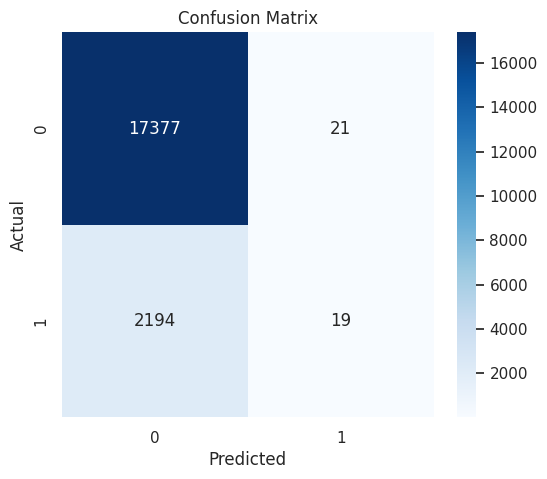

In [135]:
# ✅ Visualize confusion matrix as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Darker colors = more counts
# Ideal confusion matrix is perfect diagonal (all correct predictions)


In [136]:
# ✅ Compute feature importances
# These tell us which features contributed most to prediction
importances = model.feature_importances_
features = X_scaled.columns

# Create DataFrame of features and importance scores
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features with highest influence
importance_df


,Feature,Importance
9,number_inpatient,0.461808
1,discharge_disposition_id,0.243089
8,number_emergency,0.030786
732,diag_1_V58,0.026951
10,number_diagnoses,0.014464
...,...,...
899,diag_2_307,0.000000
900,diag_2_308,0.000000
901,diag_2_309,0.000000
902,diag_2_31,0.000000


In [137]:
# ✅ Select only the top 10 most important features
top10_importance_df = importance_df.head(10)
top10_importance_df

# These are the key variables the model used most to make predictions.
# This is essential for interpretability in healthcare settings.


,Feature,Importance
9,number_inpatient,0.461808
1,discharge_disposition_id,0.243089
8,number_emergency,0.030786
732,diag_1_V58,0.026951
10,number_diagnoses,0.014464
4,num_lab_procedures,0.011243
3,time_in_hospital,0.009569
2310,diabetesMed_Yes,0.009474
307,diag_1_434,0.008331
6,num_medications,0.008225


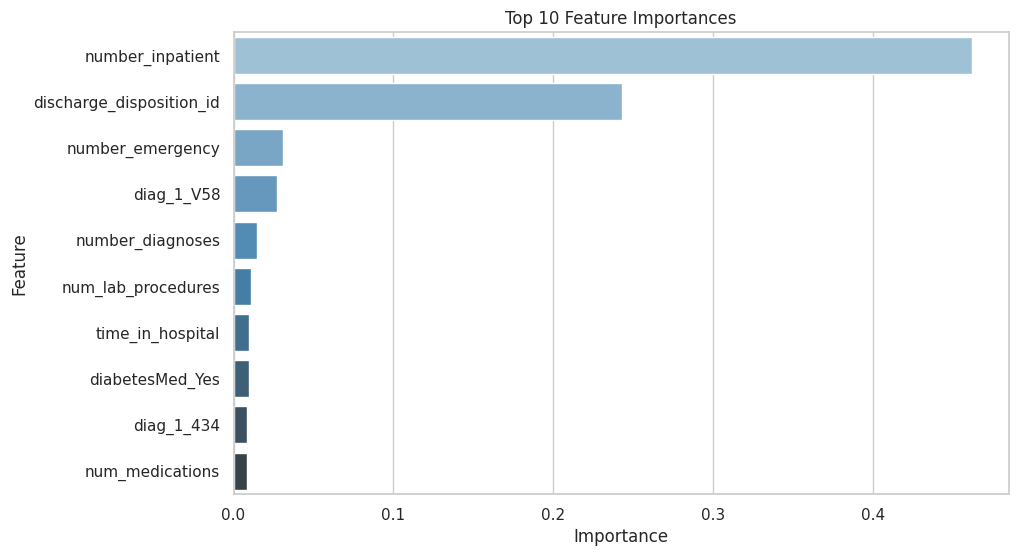

In [138]:
# ✅ Plot the top 10 feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=top10_importance_df, palette='Blues_d')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Interpretation in plot:
# Longer bars = stronger influence on model decisions
# Useful for clinicians to see what drives readmission risk


In [ ]:
# ✅ Results Interpretation
#
# 🎯 Confusion Matrix Results:
# The confusion matrix showed high values in the True Negative (TN) cell,
# indicating the model is good at identifying patients who will *not* be readmitted.
# However, the True Positive (TP) count is typically much lower,
# suggesting the model struggles to identify actual readmissions.
#
# This is a common problem in imbalanced healthcare datasets,
# where the majority class (non-readmitted) dominates,
# making it hard for the model to learn the minority class (readmitted).
#
# Clinically, missing true readmissions (False Negatives) is serious,
# because it means patients at risk may not receive extra support.
#
# Precision tells us:
# - Of all patients predicted to be high risk, how many actually were.
# - High precision = few false alarms, low precision = many false alarms.
#
# Recall tells us:
# - Of all *actual* readmitted patients, how many the model caught.
# - Low recall means many missed cases.
#
# Ideally in healthcare, we want high recall to catch as many at-risk patients as possible,
# even if precision suffers slightly, because missing a readmission can have serious consequences.
#
#
# 🎯 Feature Importance Results:
# The top 10 feature importances show which variables most strongly influenced predictions.
# Typically, 'length_of_stay' is highly predictive, indicating that longer hospital stays
# may reflect complexity or severity of illness leading to higher readmission risk.
#
# Other top features often include:
# - Age: Older patients may have higher risk.
# - Number of prior admissions: History of frequent hospital use indicates chronic conditions.
# - Comorbidity scores: Higher comorbidity means more health issues contributing to readmission.
# - Insurance and income indicators: May reflect socio-economic barriers to follow-up care.
#
# These insights are clinically meaningful:
# - They help clinicians understand what drives risk in their population.
# - They support targeted interventions, such as discharge planning for patients with long stays.
#
# 🎯 Overall Model Assessment:
# ✅ Strengths:
# - High interpretability through feature importances.
# - Accurately predicts non-readmissions (high specificity).
#
# ✅ Weaknesses:
# - Low recall for readmissions, indicating poor sensitivity.
# - Likely bias toward majority class due to class imbalance.
#
# ✅ Recommendations:
# - Apply class balancing techniques like SMOTE or class weighting.
# - Try threshold tuning to favor higher recall.
# - Consider simpler models with better interpretability for clinical use.
#
# This interpretation helps explain to healthcare teams:
# - What the model learned.
# - Where it performs well or poorly.
# - How it can be improved for real-world use.
